In [1]:
%pylab inline 
%load_ext autoreload
%autoreload 2
import pickle
import numpy as np
import numdifftools as nd
import tensorflow as tf
import DifferentiableHOS as DHOS
import tensorflow_addons as tfa

Populating the interactive namespace from numpy and matplotlib


In [2]:
results = pickle.load( open( "/global/u1/d/dlan/DifferentiableHOS/notebooks/kmap_low", "rb" ) )

In [3]:
kmap = results['kmap']
m = results['map']

In [4]:
@tf.function
def compute_gradient(kmap):
  """ Function that actually computes the Jacobian of a given statistics
    """
  
  with tf.GradientTape() as tape:
    tape.watch(kmap)
    l1 = DHOS.statistics.l1norm(kmap[...,0],nscales=1, nbins=7,value_range=[-0.03, 0.03])[1][0]
    l1=tf.reduce_sum(l1)
  jac = tape.gradient(l1, kmap)
  return jac 


In [5]:
dl1_tf=compute_gradient(kmap)
dl1_tf=tf.reshape(dl1_tf,[256])

In [6]:
import numdifftools as nd
@tf.function
def func(kmap):
    kmap=tf.cast(kmap,dtype=float32)
    kmap = tf.expand_dims(kmap,0)
    kmap=tf.reshape(kmap,[16,16])
    kmap = tf.expand_dims(kmap,0)
    l1 = DHOS.statistics.l1norm(kmap, nbins=7,value_range=[-0.03, 0.03],nscales=1)[1][0]
    l1=tf.reduce_sum(l1)
    return l1
dl1=nd.Gradient(func)
dl1_np=dl1(kmap[0,...,0])

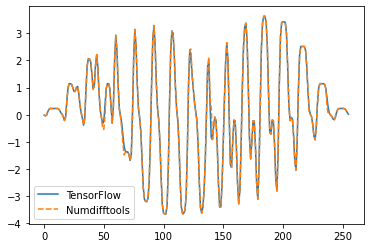

In [7]:
plot(dl1_tf[:],label='TensorFlow')
plot(dl1_np[:],'--',label='Numdifftools')
legend()
#savefig('l1norm_der.png',dpi=120)